ECE 3311 - Project 2 (Team 6: Maya Flores, Selina Spry, Emma Williams)

In [114]:
# imports 
import numpy as np
import scipy as spy
import scipy.interpolate
import matplotlib.pyplot as plt
import math

In [115]:
# Define plotting parameters
pxoffset = 1
pyoffset = 1
pwidth = 4
pheight = 3
txtsize = 9

# simulation parameters
L = 100   # Length of the overall transmission
N = 10    # Pulse duration for rectangular pulse train
M = 10    # Upsampling factor for generating analog waveform
L_lc = 20 # Line coding pulse duration

In [116]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

In [117]:
# Matlab's quantiz function
def quantize(signal, partitions, codebook):
    indices = []
    quanta = []
    for datum in signal:
        index = 0
        while index < len(partitions) and datum > partitions[index]:
            index += 1
        indices.append(index)
        quanta.append(codebook[index])
    return indices, quanta

In [118]:
def plot_3plot_3stem(plot1, plot2, plot3, plot4, plot5, plot6):
    plt.figure(figsize=(20, 15))

    plt.subplot(321)
    plt.plot(np.arange(1,L+1),plot1)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(322)
    plt.stem(np.arange(1,L+1),plot2)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(323)
    plt.plot(np.arange(1,L+1),plot3)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(324)
    plt.stem(np.arange(1,L+1),plot4)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(325)
    plt.plot(np.arange(1,L+1),plot5)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(326)
    plt.stem(np.arange(1,L+1),plot6)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.show()

In [119]:
def plot_6stem(plot1, plot2, plot3, plot4, plot5, plot6):
    plt.figure(figsize=(20, 15))

    plt.subplot(321)
    plt.stem(np.arange(1,L+1),plot1)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(322)
    plt.stem(np.arange(1,L+1),plot2)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(323)
    plt.stem(np.arange(1,L+1),plot3)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(324)
    plt.stem(np.arange(1,L+1),plot4)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(325)
    plt.stem(np.arange(1,L+1),plot5)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(326)
    plt.stem(np.arange(1,L+1),plot6)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.show()

In [120]:
def analog_cos(freq):
    signal = np.zeros(10)
    for i in range(10):
        signal[i] = np.cos(2*np.pi*freq*i)
    analog_wavefm = interpolate_1d_vector(signal, M)
    return analog_wavefm

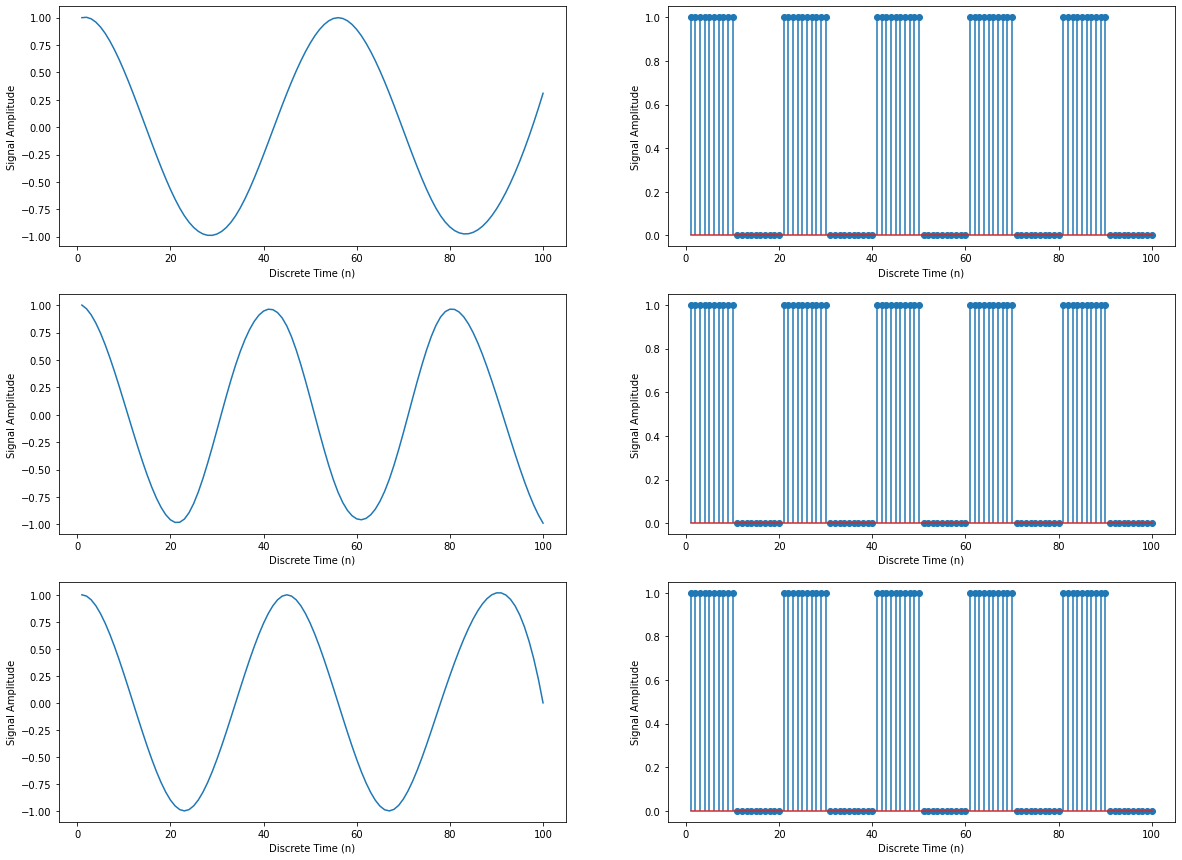

In [121]:
# Question 1:

analog_wavefm1 = analog_cos(0.2)
analog_wavefm2 = analog_cos(0.275)
analog_wavefm3 = analog_cos(0.25)
impulsetrain_wavefm = np.reshape(np.ones((N,1))*np.remainder(np.arange(1,((L/N)+1)),2),(1,L), order='F')

# Visualize
plot_3plot_3stem(analog_wavefm1, impulsetrain_wavefm.T, analog_wavefm2, impulsetrain_wavefm.T, analog_wavefm3, impulsetrain_wavefm.T)

In [122]:
def pam(waveform):
    # Natural Sampling PAM
    nspam_wavefm = np.multiply(impulsetrain_wavefm, waveform).T#impulsetrain_wavefm.*analog_wavefm;

    # Flat-Top PAM

    #downsampling
    temp1 = waveform[0::2*N]

    # upsampling 
    temp2 = (int)(N/2)
    temp3 = N
    temp = np.zeros((temp3,))
    temp[::2] = temp1

    ftpam_wavefm = np.reshape(np.ones((N,1))*temp,(1,L), order='F')

    return nspam_wavefm, ftpam_wavefm


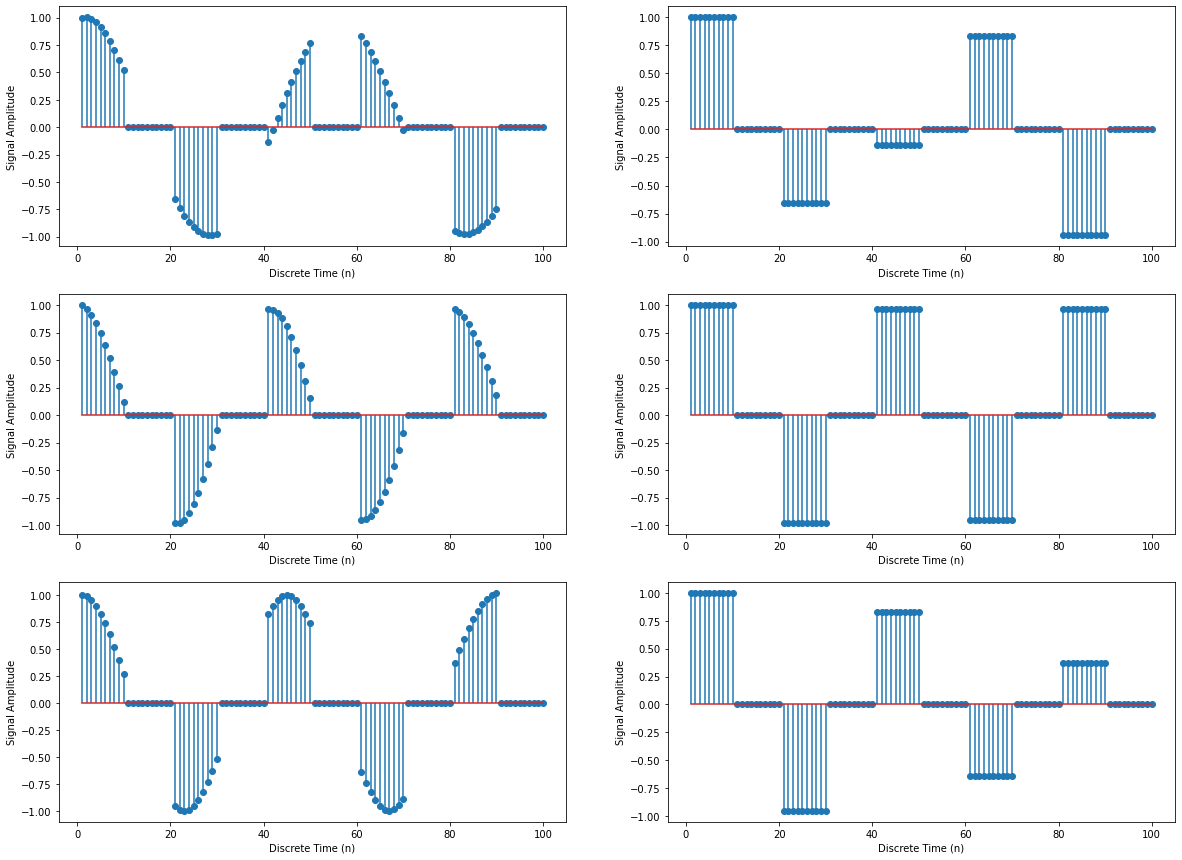

In [123]:
# Question 2:
pam_wave1 = pam(analog_wavefm1)
pam_wave2 = pam(analog_wavefm2)
pam_wave3 = pam(analog_wavefm3)

# Visualize
plot_6stem(pam_wave1[0], pam_wave1[1].T, pam_wave2[0], pam_wave2[1].T, pam_wave3[0], pam_wave3[1].T)

In [124]:
def pcm(waveform):
    # Create PCM waveform and its corresponding error waveform
    [ind,quantv] = quantize(waveform[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
    pcm_wavefm = np.reshape(np.ones((N,1))*quantv,[1,L], order='F')
    pcm_err_wavefm = waveform - pcm_wavefm
    return pcm_wavefm, pcm_err_wavefm

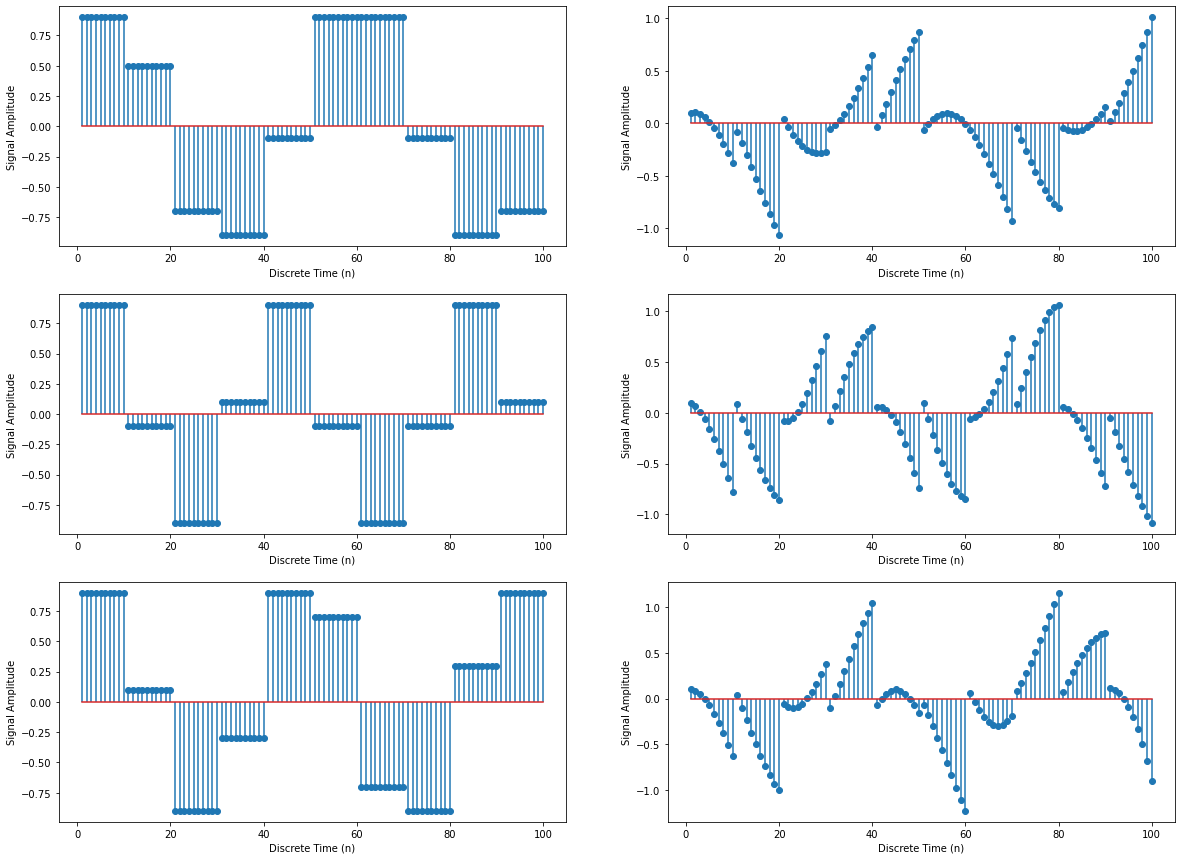

In [125]:
# Question 3:
pcm_wave1 = pcm(analog_wavefm1)
pcm_wave2 = pcm(analog_wavefm2)
pcm_wave3 = pcm(analog_wavefm3)

# Visualize
plot_6stem(pcm_wave1[0].T, pcm_wave1[1].T, pcm_wave2[0].T, pcm_wave2[1].T, pcm_wave3[0].T, pcm_wave3[1].T)


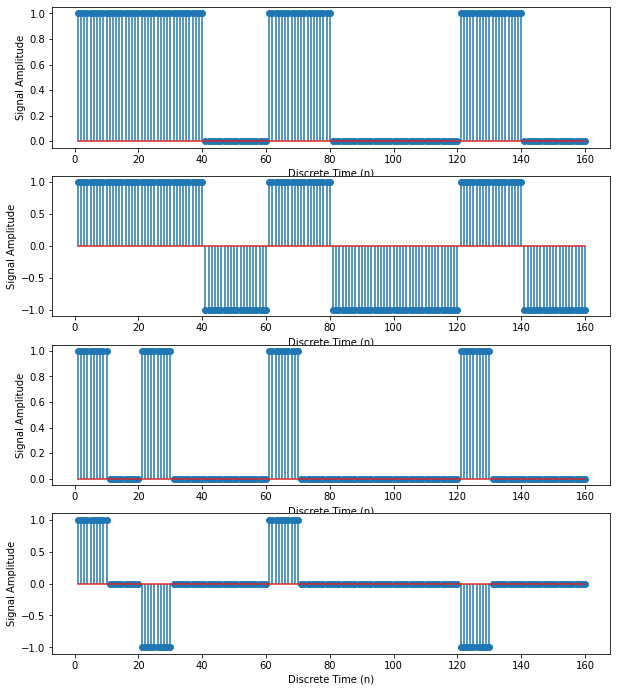

In [140]:
# Question 4:

# Generate your own line codes for the binary string `11001100'
bin_str = [1,1,0,1,0,0,1,0]
counter = 0

# unipolar NRZ
upnrz1 = np.ones((1,L_lc))
upnrz0 = np.zeros((1,L_lc))
upnrz_wavefm = list()
bpflag = 0

# polar NRZ
pnrz1 = np.ones((1,L_lc))
pnrz0 = np.full((1,L_lc),-1)
pnrz_wavefm = list()

# unipolar RZ
uprz1_begin = np.ones((1,(int)(L_lc/2)))
uprz1_end = np.zeros((1,(int)(L_lc/2)))
uprz1 = np.append(uprz1_begin,uprz1_end)
uprz0 = np.zeros((1,L_lc))
uprz_wavefm = list()

# bipolar RZ
bprz1_begin = np.ones((1,(int(L_lc/2))))
bprz1n_begin = np.full((1,(int)(L_lc/2)),-1)
bprz1_end = np.zeros((1,(int)(L_lc/2)))
bprz1 = np.append(bprz1_begin,bprz1_end)
bprz1n = np.append(bprz1n_begin,bprz1_end)
bprz0 = np.zeros((1,L_lc))
bprz_wavefm = list()

# # manchester NRZ
# manrz1 = np.ones((1,(int)(L_lc/2)))
# marz1n = np.full((1,(int)(L_lc/2)),-1)
# marz0 = np.zeros((1,(int)(L_lc/2)))
# marz_wavefm = list()

for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        upnrz_wavefm.append(upnrz1.flatten())
        pnrz_wavefm.append(pnrz1.flatten())
        uprz_wavefm.append(uprz1.flatten())
        if (counter%2 ==0):  # if even number
            bprz_wavefm.append(bprz1.flatten())
        else:
            bprz_wavefm.append(bprz1n.flatten())
        counter += 1
    else:
        upnrz_wavefm.append(upnrz0.flatten())
        pnrz_wavefm.append(pnrz0.flatten())
        uprz_wavefm.append(uprz0.flatten())
        bprz_wavefm.append(bprz0.flatten())

# Visualize
plt.figure(figsize=(10,15))
# unipolar NRZ
plt.subplot(511)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(upnrz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# polar NRZ
plt.subplot(512)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(pnrz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# unipolar RZ
plt.subplot(513)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(uprz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# bipolar RZ
plt.subplot(514)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(bprz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# manchester NRZ

plt.show()